In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import tensorflow_hub as hub

In [40]:
root_dir = os.path.abspath(os.path.join(os.pardir,'datasets','EmotionDetection'))

In [41]:
os.listdir(os.path.abspath(os.path.join(root_dir, 'train','angry')))

['0.jpg',
 '1.jpg',
 '10.jpg',
 '10002.jpg',
 '10016.jpg',
 '10037.jpg',
 '10038.jpg',
 '10057.jpg',
 '10063.jpg',
 '10069.jpg',
 '10100.jpg',
 '10105.jpg',
 '10115.jpg',
 '10122.jpg',
 '10142.jpg',
 '1015.jpg',
 '10154.jpg',
 '10155.jpg',
 '10158.jpg',
 '1016.jpg',
 '10167.jpg',
 '10178.jpg',
 '1018.jpg',
 '10181.jpg',
 '10192.jpg',
 '10196.jpg',
 '10202.jpg',
 '10207.jpg',
 '10214.jpg',
 '10223.jpg',
 '10226.jpg',
 '10240.jpg',
 '10242.jpg',
 '10250.jpg',
 '10251.jpg',
 '10253.jpg',
 '10265.jpg',
 '10287.jpg',
 '10302.jpg',
 '10310.jpg',
 '10325.jpg',
 '10348.jpg',
 '10359.jpg',
 '10363.jpg',
 '10364.jpg',
 '10373.jpg',
 '10377.jpg',
 '10378.jpg',
 '10385.jpg',
 '10388.jpg',
 '1039.jpg',
 '10394.jpg',
 '10397.jpg',
 '10401.jpg',
 '10420.jpg',
 '10429.jpg',
 '10430.jpg',
 '10431.jpg',
 '10439.jpg',
 '10440.jpg',
 '10441.jpg',
 '10462.jpg',
 '10472.jpg',
 '10475.jpg',
 '10490.jpg',
 '10497.jpg',
 '1051.jpg',
 '10510.jpg',
 '10511.jpg',
 '10541.jpg',
 '10544.jpg',
 '10548.jpg',
 '10563.

In [42]:
example_image_path = os.path.join(root_dir, 'train', 'sad', os.listdir(os.path.join(root_dir, 'train','sad'))[1])

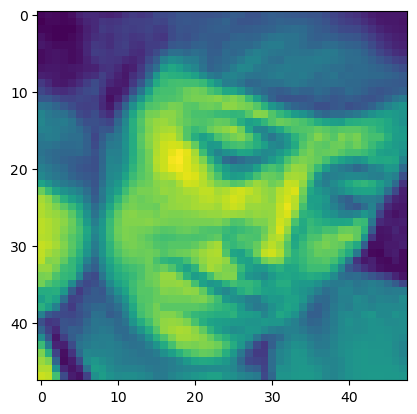

In [43]:
example_image = plt.imread(example_image_path)
plt.imshow(example_image);

In [44]:
root_dir

'C:\\D-Drive\\ComputerScience\\DSProjs\\DataScience-Projects\\datasets\\EmotionDetection'

In [45]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255., horizontal_flip = True, rotation_range = 45, shear_range = 0.3, zoom_range = 0.3, width_shift_range=0.2, height_shift_range=0.2)

In [46]:
train_dataset = train_datagen.flow_from_directory(os.path.join(root_dir, 'train'), target_size = (48, 48), batch_size = 128)

Found 28821 images belonging to 7 classes.


In [47]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255., horizontal_flip = True, rotation_range = 45, shear_range = 0.3, zoom_range = 0.3, width_shift_range=0.2, height_shift_range=0.2)

In [48]:
validation_dataset = validation_datagen.flow_from_directory(os.path.join(root_dir, 'validation'), target_size = (48, 48), batch_size = 128)

Found 7066 images belonging to 7 classes.


In [102]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D( 64, (3 , 3), activation='relu', input_shape = (48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3 , 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3 , 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation = 'softmax')
    
])

In [103]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 256)      

In [104]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data = validation_dataset, epochs = 30  )

Epoch 1/30
226/226 [==============================] - ETA: 0s - loss: 1.8219 - accuracy: 0.2436WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022A7A2D10D0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
226/226 [==============================] - 192s 847ms/step - loss:

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend();

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend();

In [55]:
## Accuracy only 50 percent. Not a very ideal number. Trying out transfer learning with VGG16

In [ ]:
from tensorflow.keras.applications import ResNet50

In [95]:
 base_model = tf.keras.applications.ResNet50(input_shape=(48,48, 3),
                                               include_top=False,
                                               weights="imagenet")

In [96]:
base_model.trainable = False

In [97]:
mv2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256, activation = 'relu'),
     tf.keras.layers.Dense(128, activation = 'relu'),
     
#     tf.keras.layers.MaxPooling2D(2, 2),
  
    tf.keras.layers.Dense(7, activation = 'softmax')
])

In [98]:
mv2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [99]:
mv2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               2097408   
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 7)                 903       
                                                                 
Total params: 25,718,919
Trainable params: 2,131,207
Non-trainable params: 23,587,712
_________________________________________________________________


In [100]:
# Showing a better accuracy

In [101]:
history_v2 = mv2.fit(train_dataset, validation_data = validation_dataset, epochs = 30  )

Epoch 1/30
 56/226 [======>.......................] - ETA: 2:17 - loss: 1.8991 - accuracy: 0.2157

KeyboardInterrupt: 

In [ ]:
test_preds = mv2.predict(validation_dataset)

In [ ]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(validation_dataset.labels,list(map(np.argmax, test_preds)))

NameError: name 'confusion_matrix' is not defined

In [80]:
plt.plot(history_v2.history['loss'], label = 'Train Loss')
plt.plot(history_v2.history['val_loss'], label = 'Val Loss')
plt.legend();

NameError: name 'history_v2' is not defined

In [81]:
plt.plot(history_v2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_v2.history['val_accuracy'], label = 'Val Accuracy')
plt.legend();

NameError: name 'history_v2' is not defined